# How's the Weather?
## Using APIs with openweathermap.org to collect and display weather data
## from October 21, 2021
### by Heather Leighton-Dick

In [131]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import citipy
import json
from citipy import citipy
import seaborn as sns

lat_range = (-90, 90)
lng_range = (-180, 180)
api_key="aeb3cf034d1ddda25b0e5ee5f3be4847"

### Generate a Random List of Cities Around the World

In [44]:
base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
headers = {"City Name": "name", "Longitude": "lon", "Latitude": "lat", "Country": "country", "Wind Speed": "speed", "Highest Temp": "temp_max", "Pressure": "pressure", "Humidity": "humidity"}
#make sure it works
city="london"
print(base_url + f'&q={city}')

req = requests.get(base_url + f'&q={city}', headers=headers)
json_data = req.json()
print(json_data)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aeb3cf034d1ddda25b0e5ee5f3be4847&q=london
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.02, 'feels_like': 50.76, 'temp_min': 50.45, 'temp_max': 56.17, 'pressure': 1014, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 332, 'gust': 5.01}, 'clouds': {'all': 75}, 'dt': 1634828703, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1634798083, 'sunset': 1634835312}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [141]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

619

### Performing the API Calls and Collecting the Data

In [142]:
raw_weather = []

base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

try:
    for city in cities:
        req = requests.get(base_url + f'&q={city}')
        json_data = req.json()
        raw_weather.append(json_data)
        print("Processing "+ city)

except requests.exceptions.RequestException as e:
        print("Processing "+ city + "failed.")



Processing ushuaia
Processing khatanga
Processing socorro
Processing sao filipe
Processing dingle
Processing sakakah
Processing hermanus
Processing iqaluit
Processing acarau
Processing avarua
Processing weiser
Processing hobart
Processing saleaula
Processing tigil
Processing rikitea
Processing stepantsevo
Processing bubaque
Processing tasiilaq
Processing victoria
Processing cherskiy
Processing luderitz
Processing nizhneyansk
Processing lebu
Processing torbay
Processing provideniya
Processing kapaa
Processing pisco
Processing uvinza
Processing punta arenas
Processing bluff
Processing vaini
Processing mataura
Processing lagoa
Processing butaritari
Processing kaitangata
Processing salalah
Processing qaanaaq
Processing mys shmidta
Processing barrow
Processing marcona
Processing nanortalik
Processing bambous virieux
Processing busselton
Processing bogale
Processing port-gentil
Processing vaitupu
Processing fevralsk
Processing kieta
Processing caninde de sao francisco
Processing vestmannaeyj

Processing xining
Processing seguin
Processing pandan
Processing woodward
Processing gorontalo
Processing tawkar
Processing lebanon
Processing port hardy
Processing elbistan
Processing grindavik
Processing muros
Processing maykain
Processing dalfsen
Processing ballina
Processing coquimbo
Processing kilembe
Processing mrirt
Processing lima
Processing matay
Processing botwood
Processing wulanhaote
Processing anito
Processing mangan
Processing aktau
Processing summerside
Processing marathon
Processing quelimane
Processing yaan
Processing amderma
Processing colwyn bay
Processing mahad
Processing oistins
Processing nha trang
Processing praia
Processing bababe
Processing chenghai
Processing mugur-aksy
Processing kalmunai
Processing harper
Processing keti bandar
Processing harbin
Processing henties bay
Processing big spring
Processing sambava
Processing doctor mora
Processing pottsville
Processing bossangoa
Processing ruhengeri
Processing haines junction
Processing tabulbah
Processing lubango

### Converting the Raw Data to a DataFrame

Display the DataFrame.
Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected.

In [143]:
#cleaning the data
cities_weather_unformed = pd.json_normalize(raw_weather, sep='_')
cities_weather_unformed = cities_weather_unformed.drop(cities_weather_unformed[cities_weather_unformed.message == "city not found"].index)

cities_weather_unformed = cities_weather_unformed.set_index("name")
cities_weather_unformed.to_csv('cities_weather_unformed_csv.csv')

#building a focused dataframe
cities_weather = cities_weather_unformed.filter(["sys_country", "coord_lon", "coord_lat", "main_pressure", "main_temp_max", "wind_speed", "main_humidity", "clouds_all"], axis=1)
cities_weather = pd.DataFrame(cities_weather)

#export to a csv for confirmation
cities_weather.to_csv('cities_weather_csv.csv')

#print a sample to show it works
cities_weather.head(75)


,sys_country,coord_lon,coord_lat,main_pressure,main_temp_max,wind_speed,main_humidity,clouds_all
name,,,,,,,,
Ushuaia,AR,-68.3000,-54.8000,1008.0,32.72,4.81,91.0,27.0
Khatanga,RU,102.5000,71.9667,1005.0,5.25,8.12,95.0,99.0
Socorro,US,-106.3033,31.6546,1021.0,75.38,5.75,25.0,20.0
São Filipe,CV,-24.4956,14.8961,1012.0,80.06,2.17,70.0,0.0
Dingle,PH,122.6711,10.9995,1010.0,84.63,12.35,75.0,76.0
...,...,...,...,...,...,...,...,...
Khuzhir,RU,107.3397,53.1939,1023.0,40.21,5.75,77.0,27.0
Ocampo,MX,-101.5000,21.6500,1021.0,54.57,7.58,87.0,10.0
Puerto Ayora,EC,-90.3518,-0.7393,1016.0,69.66,7.29,89.0,89.0


## Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Use matplotlib
Save the plotted figures as .pngs and embed those pngs in your readme file.

### Latitude vs. Temperature

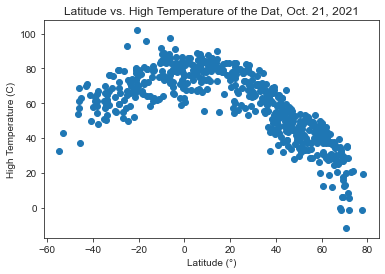

In [162]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["coord_lat"], cities_weather["main_temp_max"])
ax.set_title("Latitude vs. High Temperature of the Dat, Oct. 21, 2021")
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("High Temperature (C)")
plt.show()

### Latitude vs. Humidity

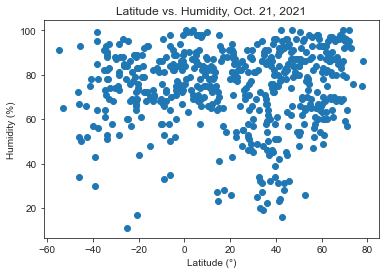

In [154]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["coord_lat"], cities_weather["main_humidity"])
ax.set_title("Latitude vs. Humidity, Oct. 21, 2021")
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("Humidity (%)")
plt.show()

### Latitude vs. Cloudiness

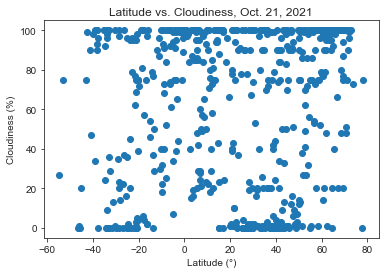

In [155]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["coord_lat"], cities_weather["clouds_all"])
ax.set_title("Latitude vs. Cloudiness, Oct. 21, 2021")
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("Cloudiness (%)")
plt.show()

### Latitude vs. Wind Speed

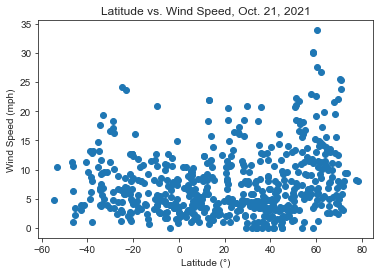

In [156]:
fig, ax = plt.subplots()
ax.scatter(cities_weather["coord_lat"], cities_weather["wind_speed"])
ax.set_title("Latitude vs. Wind Speed, Oct. 21, 2021")
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("Wind Speed (mph)")
plt.show()

## Use the Seaborn library to re-create 2-4 of the above plots.


### Latitude vs. Temperature

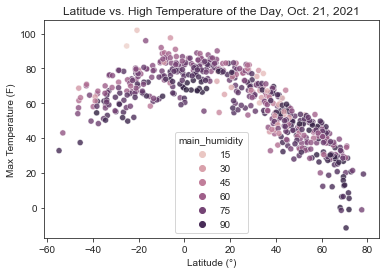

In [168]:
sns.set_style("whitegrid")
sns.set_style("ticks")
g = sns.scatterplot(x="coord_lat", y="main_temp_max", data=cities_weather, hue="main_humidity", alpha=0.8)
g.set_title("Latitude vs. High Temperature of the Day, Oct. 21, 2021")
g.set(xlabel="Latitude (°)", ylabel="Max Temperature (F)")
plt.show()

### Latitude vs. Humidity

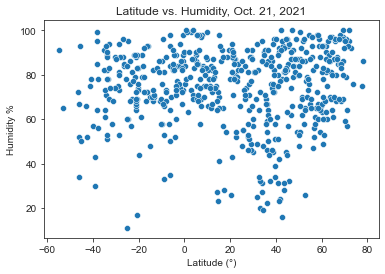

In [158]:
sns.set_style("whitegrid")
sns.set_style("ticks")
h = sns.scatterplot(x="coord_lat", y="main_humidity", data=cities_weather)
h.set_title("Latitude vs. Humidity, Oct. 21, 2021")
h.set(xlabel="Latitude (°)", ylabel="Humidity %")
plt.show()

### Latitude vs. Cloudiness

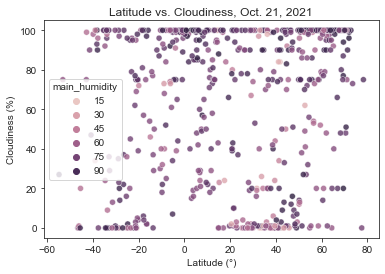

In [169]:
sns.set_style("whitegrid")
sns.set_style("ticks")
c = sns.scatterplot(x="coord_lat", y="clouds_all", data=cities_weather, hue="main_humidity", alpha=0.8)
c.set_title("Latitude vs. Cloudiness, Oct. 21, 2021")
c.set(xlabel="Latitude (°)", ylabel="Cloudiness (%)")
plt.show()

### Latitude vs. Wind Speed

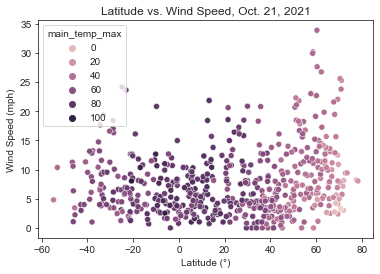

In [170]:
sns.set_style("whitegrid")
sns.set_style("ticks")
w = sns.scatterplot(x="coord_lat", y="wind_speed", data=cities_weather, hue="main_temp_max")
w.set_title("Latitude vs. Wind Speed, Oct. 21, 2021")
w.set(xlabel="Latitude (°)", ylabel="Wind Speed (mph)")
plt.show()

## Three Observable Trends Based on the Data

1) In "Latitude vs. High Temperature of the Day", we can see that the highest temperatures of the day occurred in cities between the latitudes of about -10 and 20, or around the equator.
2) According to "Latitude vs. Humidity," there's a wider range of humidity values in cities above the equator.
3) The "Latitude vs. Wind Speed" plot shows that the highest wind speeds recorded in this sample of cities happen along the 60th parallel north; wind speeds of between 0 and 10 mph seem to be most common. Additionally, cities along the 60th parallel or above seem to have less humidity and slightly greater wind speed.

In [ ]:
#Helpful Sources:
#https://towardsdatascience.com/how-to-pull-data-from-an-api-using-python-requests-edcc8d6441b1

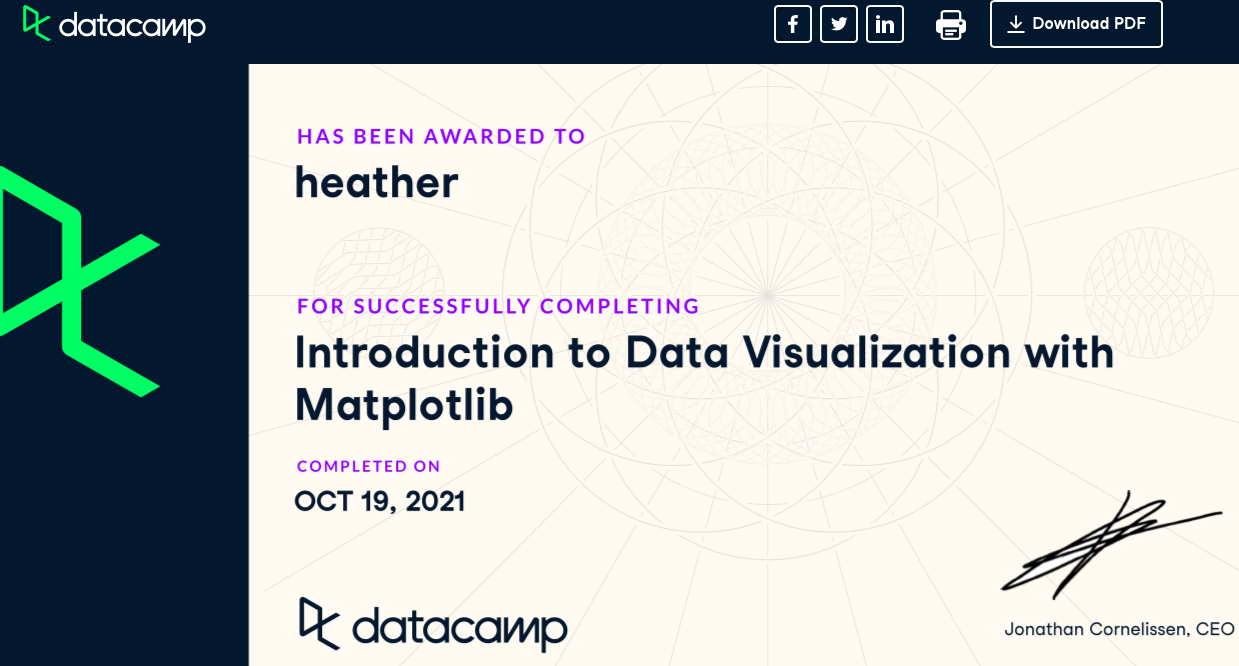

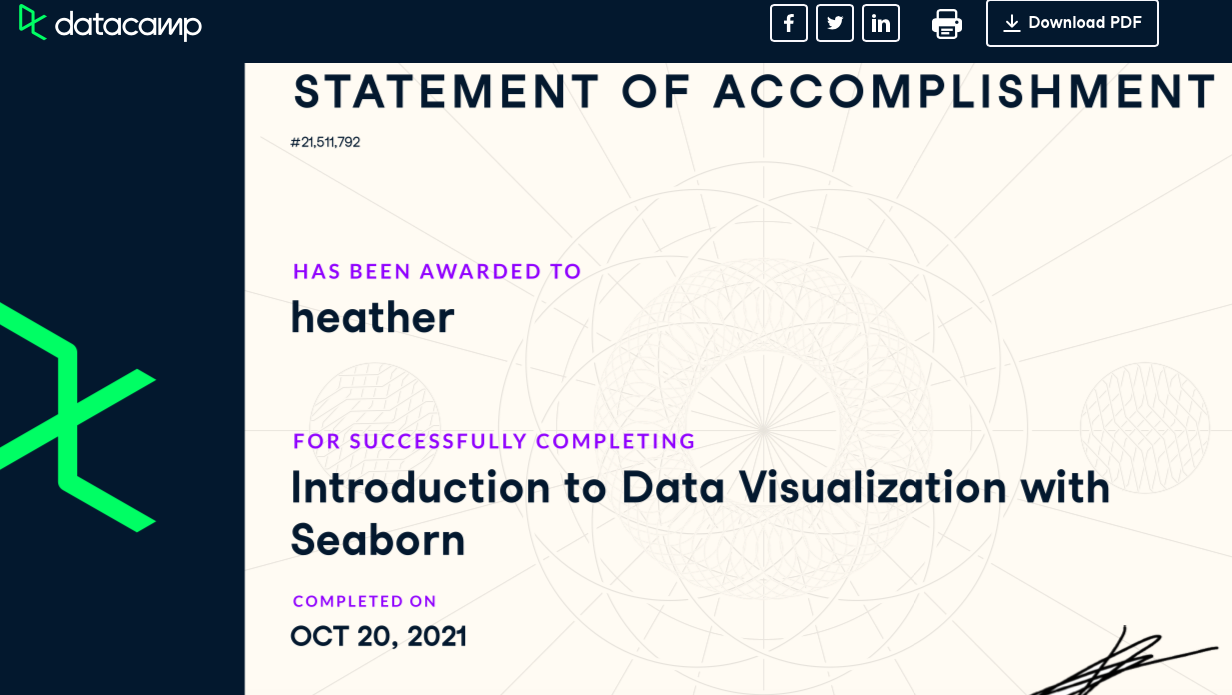